# <b><span style='color:#F1A424'>AutoML - Regression </span> </b>

## <b> Problem overview:</b>
    


The housing price dataset contains range of features associated with residential properties, including their physical attributes, amenities, and location-related characteristics. It is a common type of dataset used for regression or predictive modeling tasks in the field of real estate or housing market analysis. 

Here are some key details about the Housing dataset:

**Features**:

- `sn`: Serial number or identifier for each housing entry.
- `lotsize`: The size of the lot or land associated with the property, typically measured in square feet.
- `bedrooms`: The number of bedrooms in the house, indicating the sleeping spaces.
- `bathrms`: The number of bathrooms in the house, reflecting the sanitary facilities available.
- `stories`: The number of stories or levels in the house, indicating its vertical structure.
- `driveway`: A binary variable indicating the presence or absence of a driveway for vehicular access.
- `recroom`: A binary variable indicating whether the house has a recreation room.
- `fullbase`: A binary variable indicating the presence or absence of a full basement in the house.
- `gashw`: A binary variable indicating whether the house has a gas hot water heating system.
- `airco`: A binary variable indicating the presence or absence of air conditioning in the house.
- `garagepl`: The number of parking spaces available in the garage.
- `prefarea`: A binary variable indicating whether the house is located in a preferred or desirable area.
- `homestyle`: A categorical variable representing the style or type of the house.

**Target Variable**:

- `price`: The price of the house, representing the cost or value of the property.
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict prices of residential property based on various features. 

**Challenges**:

- Potential challenges in working with this dataset may include handling missing or skewed data.
- Managing categorical variables like 'homestyle' and addressing the complexities associated with predicting housing prices.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("decisionforestpredict", ["housing_train", "housing_test"])

In [5]:
# Fetching in teradata dataframe
housing_train = DataFrame.from_table("housing_train")
housing_test = DataFrame.from_table("housing_test")

In [6]:
# Housing train dataset
housing_train.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
3,49500.0,3060.0,3,1,1,yes,no,no,no,no,0,no,Classic
5,61000.0,6360.0,2,1,1,yes,no,no,no,no,0,no,Eclectic
6,66000.0,4160.0,3,1,1,yes,yes,yes,no,yes,0,no,Eclectic
7,66000.0,3880.0,3,2,2,yes,no,yes,no,no,2,no,Eclectic
9,83800.0,4800.0,3,1,1,yes,yes,yes,no,no,0,no,Eclectic
10,88500.0,5500.0,3,2,4,yes,yes,no,no,yes,1,no,Eclectic
8,69000.0,4160.0,3,1,3,yes,no,no,no,no,0,no,Eclectic
4,60500.0,6650.0,3,1,2,yes,yes,no,no,no,0,no,Eclectic
2,38500.0,4000.0,2,1,1,yes,no,no,no,no,0,no,Classic
1,42000.0,5850.0,3,1,2,yes,no,yes,no,no,1,no,Classic


In [7]:
# Housing train dataset shape
housing_train.shape

(492, 14)

In [8]:
# Housing test dataset
housing_test.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
25,42000.0,4960.0,2,1,1,yes,no,no,no,no,0,no,Classic
53,68000.0,9166.0,2,1,1,yes,no,yes,no,yes,2,no,Eclectic
111,43000.0,5076.0,3,1,1,no,no,no,no,no,0,no,Classic
117,93000.0,3760.0,3,1,2,yes,no,no,yes,no,2,no,Eclectic
140,43000.0,3750.0,3,1,2,yes,no,no,no,no,0,no,Classic
142,40000.0,2650.0,3,1,2,yes,no,yes,no,no,1,no,Classic
132,44500.0,3850.0,3,1,2,yes,no,no,no,no,0,no,Classic
38,67000.0,5170.0,3,1,4,yes,no,no,no,yes,0,no,Eclectic
16,37900.0,3185.0,2,1,1,yes,no,no,no,yes,0,no,Classic
13,27000.0,1700.0,3,1,2,yes,no,no,no,no,0,no,Classic


In [9]:
# Housing test dataset shape
housing_test.shape

(46, 14)

In [8]:
AutoML.generate_custom_config("custom_housing")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  2,4,7,8



Customizing Bincode Encoding ...

Provide the following details to customize binning and coding encoding:

Available binning methods with corresponding indices:
Index 1: Equal-Width
Index 2: Variable-Width



Enter the feature or list of features for binning:  bedrooms

Enter the index of corresponding binning method for feature bedrooms:  2

Enter the number of bins for feature bedrooms:  2



Available value type of feature for variable binning with corresponding indices:
Index 1: int
Index 2: float

Provide the range for bin 1 of feature bedrooms: 



Enter the index of corresponding value type of feature bedrooms:  1

Enter the minimum value for bin 1 of feature bedrooms:  0

Enter the maximum value for bin 1 of feature bedrooms:  2

Enter the label for bin 1 of feature bedrooms:  small_house



Provide the range for bin 2 of feature bedrooms: 



Enter the index of corresponding value type of feature bedrooms:  1

Enter the minimum value for bin 2 of feature bedrooms:  3

Enter the maximum value for bin 2 of feature bedrooms:  5

Enter the label for bin 2 of feature bedrooms:  big_house



Customization of bincode encoding has been completed successfully.

Customizing Categorical Encoding ...

Provide the following details to customize categorical encoding:

Available categorical encoding methods with corresponding indices:
Index 1: OneHotEncoding
Index 2: OrdinalEncoding
Index 3: TargetEncoding



Enter the list of corresponding index categorical encoding methods you want to use:  2,3

Enter the feature or list of features for OrdinalEncoding:  homestyle

Enter the feature or list of features for TargetEncoding:  prefarea



Available target encoding methods with corresponding indices:
Index 1: CBM_BETA
Index 2: CBM_DIRICHLET
Index 3: CBM_GAUSSIAN_INVERSE_GAMMA



Enter the index of target encoding method for feature prefarea:  3

Enter the response column for target encoding method for feature prefarea:  price



Customization of categorical encoding has been completed successfully.

Customizing Antiselect Features ...



Enter the feature or list of features for antiselect:  sn



Customization of antiselect features has been completed successfully.

Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,2,3,4,5



Customizing Train Test Split ...



Enter the train size for train test split:  0.75



Customization of train test split has been completed successfully.

Customizing Data Imbalance Handling ...

Available data sampling methods with corresponding indices:
Index 1: SMOTE
Index 2: NearMiss



Enter the corresponding index data imbalance handling method:  1



Customization of data imbalance handling has been completed successfully.

Customizing Outlier Handling ...

Available outlier detection methods with corresponding indices:
Index 1: percentile
Index 2: tukey
Index 3: carling



Enter the corresponding index oulier handling method:  1

Enter the lower percentile value for outlier handling:  0.1

Enter the upper percentile value for outlier handling:  0.9

Enter the feature or list of features for outlier handling:  bathrms



Available outlier replacement methods with corresponding indices:
Index 1: delete
Index 2: median
Index 3: Any Numeric Value



Enter the index of corresponding replacement method for feature bathrms:  1



Customization of outlier handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Customization of feature scaling has been completed successfully.

Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  3



Customizing Model Training Phase ...

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  1



Customizing Model Hyperparameter ...

Available models for hyperparameter tuning with corresponding indices:
Index 1: decision_forest
Index 2: xgboost
Index 3: knn
Index 4: glm
Index 5: svm

Available hyperparamters update methods with corresponding indices:
Index 1: ADD
Index 2: REPLACE



Enter the list of model indices for performing hyperparameter tuning:  2



Available hyperparameters for model 'xgboost' with corresponding indices:
Index 1: min_impurity
Index 2: max_depth
Index 3: min_node_size
Index 4: shrinkage_factor
Index 5: iter_num



Enter the list of hyperparameter indices for model 'xgboost':  3

Enter the index of corresponding update method for hyperparameters 'min_node_size' for model 'xgboost':  1

Enter the list of value for hyperparameter 'min_node_size' for model 'xgboost':  1,2



Customization of model hyperparameter has been completed successfully.

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  2



Customization of model training phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  4



Generating custom json and exiting ...

Process of generating custom config file for AutoML has been completed successfully.

'custom_housing.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [10]:
# Creating AutoML instance
aml = AutoML(task_type="Regression",
             exclude=['glm','svm','knn'],
             verbose=2,
             max_runtime_secs=300,
             stopping_metric='R2',
             stopping_tolerance=0.7,
             custom_config_file='custom_housing.json')


 Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "bedrooms": {
            "Type": "Variable-Width",
            "NumOfBins": 2,
            "Bin_1": {
                "min_value": 0,
                "max_value": 2,
                "label": "small_house"
            },
            "Bin_2": {
                "min_value": 3,
                "max_value": 5,
                "label": "big_house"
            }
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "OrdinalEncodingIndicator": true,
        "OrdinalEncodingList": [
            "homestyle"
        ],
        "TargetEncodingIndicator": true,
        "TargetEncodingList": {
            "prefarea": {
                "encoder_method": "CBM_GAUSSIAN_INVERSE_GAMMA",
                "response_column": "price"
            }
        }
    },
    "AntiselectIndicator": true,
    "AntiselectParam": [
        "sn"
    ],
    "TrainTestSpl

Feature Exploration started ...

Data Overview:
Total Rows in the data: 492
Total Columns in the data: 14

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
fullbase,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
homestyle,VARCHAR(20) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
sn,INTEGER,492,0,None,0,492,0,0.0,100.0
driveway,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
lotsize,FLOAT,492,0,None,0,492,0,0.0,100.0
recroom,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
stories,INTEGER,492,0,None,0,492,0,0.0,100.0
bedrooms,INTEGER,492,0,None,0,492,0,0.0,100.0
bathrms,INTEGER,492,0,None,0,492,0,0.0,100.0
price,FLOAT,492,0,None,0,492,0,0.0,100.0



Statistics of Data:


func,sn,price,lotsize,bedrooms,bathrms,stories,garagepl
50%,274,62000,4616,3,1,2,0
count,492,492,492,492,492,492,492
mean,272.943,68100.396,5181.795,2.965,1.293,1.803,0.685
min,1,25000,1650,1,1,1,0
max,546,190000,16200,6,4,4,3
75%,413.25,82000,6370,3,2,2,1
25%,132.5,49975,3600,2,1,1,0
std,159.501,26472.496,2182.443,0.731,0.51,0.861,0.854



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
driveway                  2         
recroom                   2         
fullbase                  2         
gashw                     2         
airco                     2         
prefarea                  2         
homestyle                 3         

No Futile columns found.

Target Column Distribution:


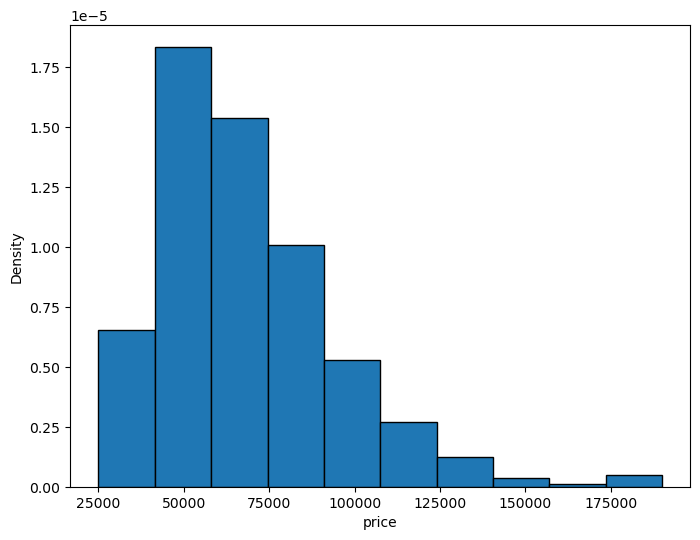

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    lotsize           2.235772
1   bedrooms           2.235772
2   garagepl           2.235772
3    stories           7.113821
4      price           2.439024
5    bathrms           0.203252


Analysis complete. No action taken.                                                     


All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                   


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


No Missing Values Detected.                                                              


No imputation is Required.                                                               


No information provided for Equal-Width Transformation.                                  


,ColumnName,MinValue,MaxValue,Label
0,bedrooms,0,2,small_house
1,bedrooms,3,5,big_house


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711283331139221"'20


stories,airco,recroom,sn,fullbase,price,bathrms,prefarea,driveway,garagepl,homestyle,lotsize,id,gashw,bedrooms
3,yes,no,535,no,82000.0,1,no,yes,0,Eclectic,5000.0,219,no,big_house  
3,no,no,349,no,60000.0,1,no,yes,0,Eclectic,4079.0,467,no,big_house  
3,yes,no,509,no,87000.0,1,no,yes,2,Eclectic,8372.0,16,no,big_house  
3,no,no,341,no,70000.0,1,no,yes,0,Eclectic,2970.0,72,no,big_house  
3,no,no,148,no,62000.0,2,no,yes,1,Eclectic,4500.0,192,yes,big_house  
3,no,no,18,no,40750.0,1,no,yes,0,Classic,5200.0,272,no,big_house  
1,no,yes,87,yes,60000.0,1,no,yes,2,Eclectic,5850.0,153,no,small_house
1,no,yes,166,yes,62000.0,1,no,yes,2,Eclectic,4075.0,511,no,big_house  
1,yes,no,258,no,75500.0,2,no,yes,2,Eclectic,4600.0,344,no,small_house
1,yes,no,327,no,101000.0,1,no,yes,1,bungalow,8880.0,234,no,small_house


Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 25% - 5/20


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711276616489499"'20


stories,airco,recroom,bedrooms,sn,fullbase,price,bathrms,prefarea,driveway,garagepl,lotsize,id,gashw,homestyle
4,yes,yes,big_house  ,381,no,103500.0,2,yes,yes,1,9000.0,88,no,0
4,yes,yes,big_house  ,521,no,103000.0,2,no,yes,1,7680.0,368,no,0
4,yes,no,big_house  ,528,no,106000.0,1,no,yes,1,6325.0,39,no,0
4,yes,yes,big_house  ,316,no,78000.0,1,no,yes,0,6210.0,175,no,2
4,yes,yes,big_house  ,10,no,88500.0,2,no,yes,1,5500.0,439,no,2
4,no,no,big_house  ,541,no,85000.0,2,no,yes,1,6525.0,134,no,2
3,yes,no,big_house  ,535,no,82000.0,1,no,yes,0,5000.0,219,no,2
3,no,no,big_house  ,349,no,60000.0,1,no,yes,0,4079.0,467,no,2
3,yes,no,big_house  ,509,no,87000.0,1,no,yes,2,8372.0,16,no,2
3,no,no,big_house  ,341,no,70000.0,1,no,yes,0,2970.0,72,no,2


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275889137351"'20


prefarea,stories,airco,recroom,bedrooms,sn,fullbase,price,bathrms,driveway,garagepl,homestyle,lotsize,id,gashw
83851.72413793103,1,no,no,small_house,477,no,61500.0,1,yes,1,2,10360.0,353,no
83851.72413793103,1,no,yes,big_house  ,407,yes,87000.0,1,yes,2,2,6600.0,225,no
83851.72413793103,1,no,yes,big_house  ,384,yes,74700.0,1,yes,2,2,7085.0,268,no
83851.72413793103,1,no,no,big_house  ,476,yes,85000.0,2,yes,1,2,6254.0,181,no
83851.72413793103,1,no,yes,big_house  ,389,yes,85000.0,1,yes,2,2,6540.0,475,no
83851.72413793103,1,yes,no,big_house  ,453,yes,73000.0,1,yes,0,2,6100.0,182,no
62906.33597883598,1,no,no,big_house  ,503,no,70000.0,1,yes,0,2,6720.0,119,no
62906.33597883598,1,no,no,big_house  ,491,no,50000.0,1,yes,0,1,12944.0,232,no
62906.33597883598,1,no,no,big_house  ,52,yes,57000.0,1,no,0,2,4100.0,346,no
62906.33597883598,1,no,no,small_house,208,yes,69500.0,1,yes,0,2,4350.0,460,no


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275511532341"'20


['airco', 'recroom', 'bedrooms', 'fullbase', 'driveway', 'gashw']


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


prefarea,stories,airco_0,airco_1,recroom_0,recroom_1,bedrooms_0,bedrooms_1,bedrooms_2,fullbase_0,fullbase_1,price,bathrms,driveway_0,driveway_1,garagepl,homestyle,lotsize,id,gashw_0,gashw_1
62906.33597883598,1,0,1,1,0,0,0,1,1,0,58500.0,1,0,1,0,2,5600.0,215,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,50000.0,1,0,1,0,1,5880.0,543,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,38500.0,1,0,1,0,1,4000.0,504,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,35000.0,1,0,1,0,1,7700.0,273,1,0
62906.33597883598,1,0,1,1,0,1,0,0,1,0,44500.0,1,1,0,0,1,3000.0,396,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,50000.0,1,0,1,1,1,3640.0,9,1,0
83851.72413793103,1,1,0,1,0,0,0,1,1,0,61500.0,1,0,1,1,2,10360.0,353,1,0
83851.72413793103,1,1,0,0,1,1,0,0,0,1,87000.0,1,0,1,2,2,6600.0,225,1,0
83851.72413793103,1,1,0,0,1,1,0,0,0,1,74700.0,1,0,1,2,2,7085.0,268,1,0
83851.72413793103,1,1,0,1,0,1,0,0,0,1,85000.0,2,0,1,1,2,6254.0,181,1,0


Training size : 0.75                                                                      
Testing size  : 0.25                                                                      


prefarea,stories,airco_0,airco_1,recroom_0,recroom_1,bedrooms_0,bedrooms_1,bedrooms_2,fullbase_0,fullbase_1,price,bathrms,driveway_0,driveway_1,garagepl,homestyle,lotsize,id,gashw_0,gashw_1
62906.33597883598,1,0,1,1,0,0,0,1,0,1,63900.0,1,0,1,1,2,6360.0,12,1,0
62906.33597883598,3,0,1,1,0,1,0,0,1,0,87000.0,1,0,1,2,2,8372.0,16,1,0
62906.33597883598,2,0,1,1,0,1,0,0,0,1,57000.0,2,1,0,0,2,4500.0,17,1,0
62906.33597883598,2,0,1,0,1,1,0,0,0,1,116000.0,1,0,1,1,0,6840.0,18,1,0
62906.33597883598,1,1,0,1,0,1,0,0,1,0,60000.0,1,0,1,2,2,5800.0,21,0,1
62906.33597883598,1,1,0,1,0,0,0,1,1,0,27000.0,1,0,1,0,1,3649.0,22,1,0
83851.72413793103,1,1,0,1,0,0,0,1,1,0,49500.0,1,0,1,1,1,5320.0,15,1,0
83851.72413793103,2,1,0,0,1,1,0,0,0,1,78000.0,2,0,1,0,2,6600.0,29,1,0
83851.72413793103,2,1,0,1,0,1,0,0,0,1,104900.0,1,0,1,1,0,11440.0,37,1,0
83851.72413793103,3,1,0,1,0,1,0,0,1,0,80000.0,1,0,1,0,2,6360.0,41,1,0


prefarea,stories,airco_0,airco_1,recroom_0,recroom_1,bedrooms_0,bedrooms_1,bedrooms_2,fullbase_0,fullbase_1,price,bathrms,driveway_0,driveway_1,garagepl,homestyle,lotsize,id,gashw_0,gashw_1
83851.72413793103,2,0,1,1,0,1,0,0,1,0,118500.0,2,0,1,1,0,4880.0,40,1,0
83851.72413793103,1,0,1,0,1,1,0,0,0,1,106000.0,2,0,1,0,0,7440.0,97,1,0
83851.72413793103,3,0,1,1,0,1,0,0,1,0,95000.0,2,0,1,0,2,6420.0,107,1,0
83851.72413793103,3,1,0,1,0,1,0,0,1,0,89000.0,1,0,1,1,2,5500.0,109,1,0
83851.72413793103,4,0,1,1,0,1,0,0,1,0,112000.0,2,0,1,0,0,6360.0,200,1,0
83851.72413793103,2,1,0,0,1,1,0,0,0,1,64900.0,2,0,1,0,2,4990.0,231,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,50000.0,1,0,1,1,1,3640.0,9,1,0
62906.33597883598,1,1,0,1,0,0,0,1,0,1,54500.0,2,1,0,0,2,3150.0,10,1,0
62906.33597883598,2,0,1,1,0,1,0,0,0,1,99000.0,2,0,1,1,2,8880.0,13,1,0
62906.33597883598,1,1,0,1,0,0,0,1,0,1,99000.0,1,0,1,1,2,13200.0,24,0,1


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0         id           9.756098
1    bathrms           2.235772
2    lotsize           9.552846
3   garagepl           2.235772
4      price           8.739837
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275054168110"'
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275846689466"'/20
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275386508830"'


['stories', 'airco_1', 'gashw_0', 'bedrooms_0', 'bedrooms_2', 'driveway_0', 'driveway_1', 'fullbase_1', 'airco_0', 'bathrms', 'recroom_1', 'recroom_0', 'gashw_1', 'garagepl', 'homestyle', 'fullbase_0', 'prefarea', 'lotsize']


['stories', 'bathrms', 'garagepl', 'homestyle', 'prefarea', 'lotsize']


airco_1,fullbase_1,airco_0,gashw_0,fullbase_0,bedrooms_0,price,recroom_1,bedrooms_2,recroom_0,gashw_1,driveway_0,id,driveway_1,stories,bathrms,garagepl,homestyle,prefarea,lotsize
1,0,0,1,1,1,78000.0,1,0,0,0,0,285,1,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.4503241622476166
1,0,0,1,1,1,107000.0,0,0,1,0,0,93,1,2.561760881009767,-0.5698449326198072,2.734538804445422,-2.2507230263268694,1.8093671611394102,0.6863093524426249
0,1,1,1,0,1,89500.0,1,0,0,0,0,356,1,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.40312712420861496
1,1,0,1,0,1,88000.0,0,0,1,0,0,329,1,-0.8999912756370573,1.7548633720450872,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.14354341499410586
1,0,0,0,1,1,52000.0,0,0,1,1,0,359,1,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,-1.3549625427441967
0,0,1,1,1,0,45000.0,0,1,1,0,0,25,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,0.7571049095011274
1,0,0,1,1,1,106000.0,0,0,1,0,0,39,1,2.561760881009767,-0.5698449326198072,0.39437329599272475,-2.2507230263268694,-0.5526794237661632,0.5565174978353704
0,0,1,1,1,0,44100.0,0,1,1,0,0,30,1,-0.8999912756370573,-0.5698449326198072,0.39437329599272475,-0.7516329215933886,-0.5526794237661632,1.3942649230276498
1,1,0,1,0,1,120900.0,1,0,0,0,0,337,1,2.561760881009767,1.7548633720450872,-0.7757094582336238,-2.2507230263268694,1.8093671611394102,0.40312712420861496
0,0,1,1,1,0,60000.0,0,1,1,0,1,62,0,-0.8999912756370573,-0.5698449326198072,0.39437329599272475,0.747457183140092,-0.5526794237661632,-0.3473057806115114


airco_1,fullbase_1,airco_0,gashw_0,fullbase_0,bedrooms_0,price,recroom_1,bedrooms_2,recroom_0,gashw_1,driveway_0,id,driveway_1,stories,bathrms,garagepl,homestyle,prefarea,lotsize
1,0,0,1,1,1,95000.0,0,0,1,0,0,107,1,1.4078434954608252,1.7548633720450872,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.601354683972422
1,0,0,1,1,1,88500.0,1,0,0,0,0,439,1,2.561760881009767,1.7548633720450872,0.39437329599272475,0.747457183140092,-0.5526794237661632,0.1671419340136067
1,0,0,1,1,1,95000.0,0,0,1,0,0,443,1,1.4078434954608252,1.7548633720450872,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.6391123144036233
0,0,1,1,1,0,52500.0,0,1,1,0,1,527,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,0.233217787268209
0,1,1,1,0,1,93000.0,0,0,1,0,0,454,1,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.7193472790699261
0,0,1,1,1,1,70000.0,0,0,1,0,0,119,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,0.742945798089427
1,0,0,1,1,1,110000.0,0,0,1,0,0,526,1,2.561760881009767,1.7548633720450872,1.5644560502190732,-2.2507230263268694,-0.5526794237661632,0.6296729067958229
0,0,1,1,1,1,25245.0,0,0,1,0,1,34,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-1.2959662451954448
0,0,1,1,1,1,110000.0,0,0,1,0,0,80,1,2.561760881009767,1.7548633720450872,1.5644560502190732,-2.2507230263268694,-0.5526794237661632,0.40312712420861496
0,0,1,1,1,0,48900.0,0,1,1,0,0,315,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.5219348213558175


['stories', 'airco_1', 'gashw_0', 'bedrooms_0', 'bedrooms_2', 'driveway_1', 'fullbase_1', 'airco_0', 'bathrms', 'recroom_1', 'recroom_0', 'gashw_1', 'garagepl', 'homestyle', 'fullbase_0', 'prefarea', 'lotsize']


['r_stories', 'r_bathrms', 'r_garagepl', 'r_homestyle', 'r_prefarea', 'r_lotsize']


r_driveway_1,r_gashw_1,r_fullbase_1,r_recroom_1,price,r_bedrooms_0,r_airco_0,r_recroom_0,r_bedrooms_2,r_gashw_0,id,r_fullbase_0,r_airco_1,r_stories,r_bathrms,r_garagepl,r_homestyle,r_prefarea,r_lotsize
1,0,0,1,78000.0,1,0,0,0,1,285,1,1,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.4503241622476166
1,0,0,0,107000.0,1,0,1,0,1,93,1,1,2.561760881009767,-0.5698449326198072,2.734538804445422,-2.2507230263268694,1.8093671611394102,0.6863093524426249
1,0,1,1,89500.0,1,1,0,0,1,356,0,0,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.40312712420861496
1,0,1,0,88000.0,1,0,1,0,1,329,0,1,-0.8999912756370573,1.7548633720450872,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.14354341499410586
1,1,0,0,52000.0,1,0,1,0,0,359,1,1,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,-1.3549625427441967
1,0,0,0,45000.0,0,1,1,1,1,25,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,0.7571049095011274
1,0,0,0,106000.0,1,0,1,0,1,39,1,1,2.561760881009767,-0.5698449326198072,0.39437329599272475,-2.2507230263268694,-0.5526794237661632,0.5565174978353704
1,0,0,0,44100.0,0,1,1,1,1,30,1,0,-0.8999912756370573,-0.5698449326198072,0.39437329599272475,-0.7516329215933886,-0.5526794237661632,1.3942649230276498
1,0,1,1,120900.0,1,0,0,0,1,337,0,1,2.561760881009767,1.7548633720450872,-0.7757094582336238,-2.2507230263268694,1.8093671611394102,0.40312712420861496
0,0,0,0,60000.0,0,1,1,1,1,62,1,0,-0.8999912756370573,-0.5698449326198072,0.39437329599272475,0.747457183140092,-0.5526794237661632,-0.3473057806115114


r_driveway_1,r_gashw_1,r_fullbase_1,r_recroom_1,price,r_bedrooms_0,r_airco_0,r_recroom_0,r_bedrooms_2,r_gashw_0,id,r_fullbase_0,r_airco_1,r_stories,r_bathrms,r_garagepl,r_homestyle,r_prefarea,r_lotsize
1,0,0,0,95000.0,1,0,1,0,1,107,1,1,1.4078434954608252,1.7548633720450872,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.601354683972422
1,0,0,1,88500.0,1,0,0,0,1,439,1,1,2.561760881009767,1.7548633720450872,0.39437329599272475,0.747457183140092,-0.5526794237661632,0.1671419340136067
1,0,0,0,95000.0,1,0,1,0,1,443,1,1,1.4078434954608252,1.7548633720450872,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.6391123144036233
0,0,0,0,52500.0,0,1,1,1,1,527,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,0.233217787268209
1,0,1,0,93000.0,1,1,1,0,1,454,0,0,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.7193472790699261
1,0,0,0,70000.0,1,1,1,0,1,119,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,0.742945798089427
1,0,0,0,110000.0,1,0,1,0,1,526,1,1,2.561760881009767,1.7548633720450872,1.5644560502190732,-2.2507230263268694,-0.5526794237661632,0.6296729067958229
0,0,0,0,25245.0,1,1,1,0,1,34,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-1.2959662451954448
1,0,0,0,110000.0,1,1,1,0,1,80,1,0,2.561760881009767,1.7548633720450872,1.5644560502190732,-2.2507230263268694,-0.5526794237661632,0.40312712420861496
1,0,0,0,48900.0,0,1,1,1,1,315,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.5219348213558175


['prefarea', 'stories', 'bathrms', 'garagepl', 'homestyle', 'lotsize']


airco_1,bedrooms_1,fullbase_1,gashw_0,airco_0,fullbase_0,bedrooms_0,price,recroom_1,bedrooms_2,recroom_0,gashw_1,driveway_0,id,driveway_1,prefarea,stories,bathrms,garagepl,homestyle,lotsize
0,0,0,1,1,1,1,65500.0,0,0,1,0,0,44,1,1.8093671611393762,0.2539261099118857,-0.5698449326198075,0.39437329599272386,0.7474571831400939,-0.6163288974338209
0,0,0,1,1,1,1,54000.0,0,0,1,0,0,54,1,1.8093671611393762,1.4078434954608345,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,-1.0807477517375974
0,0,1,1,1,0,1,61100.0,0,0,1,0,0,58,1,1.8093671611393762,0.2539261099118857,-0.5698449326198075,1.5644560502190699,0.7474571831400939,-0.8239958648054283
0,0,0,1,1,1,0,51500.0,0,1,1,0,0,61,1,1.8093671611393762,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,-0.5408136365714183
1,0,1,1,0,0,1,95000.0,1,0,0,0,0,81,1,1.8093671611393762,-0.8999912756370632,-0.5698449326198075,1.5644560502190699,0.7474571831400939,0.26153601009161004
1,0,0,1,0,1,1,103500.0,1,0,0,0,0,88,1,1.8093671611393762,2.5617608810097834,1.7548633720450884,0.39437329599272386,-2.2507230263268747,1.8190382653786652
1,0,1,1,0,0,0,63900.0,0,1,1,0,0,12,1,-0.5526794237661955,-0.8999912756370632,-0.5698449326198075,0.39437329599272386,0.7474571831400939,0.5730364611490211
1,0,0,1,0,1,1,87000.0,0,0,1,0,0,16,1,-0.5526794237661955,1.4078434954608345,-0.5698449326198075,1.5644560502190699,0.7474571831400939,1.5226408664937345
1,0,1,1,0,0,1,57000.0,0,0,1,0,1,17,0,-0.5526794237661955,0.2539261099118857,1.7548633720450884,-0.7757094582336221,0.7474571831400939,-0.30482844637640993
1,0,1,1,0,0,1,116000.0,1,0,0,0,0,18,1,-0.5526794237661955,0.2539261099118857,-0.5698449326198075,0.39437329599272386,-2.2507230263268747,0.7995822437362291


airco_1,bedrooms_1,fullbase_1,gashw_0,airco_0,fullbase_0,bedrooms_0,price,recroom_1,bedrooms_2,recroom_0,gashw_1,driveway_0,id,driveway_1,prefarea,stories,bathrms,garagepl,homestyle,lotsize
1,0,1,1,0,0,1,99000.0,0,0,1,0,0,13,1,-0.5526794237661955,0.2539261099118857,1.7548633720450884,0.39437329599272386,0.7474571831400939,1.7624018197318632
0,0,0,1,1,1,1,25245.0,0,0,1,0,1,34,0,-0.5526794237661955,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,-0.7516329215933905,-1.295966245195445
0,0,0,1,1,1,1,75000.0,1,0,0,0,0,36,1,-0.5526794237661955,0.2539261099118857,1.7548633720450884,1.5644560502190699,0.7474571831400939,2.1966145696906785
0,0,0,1,1,1,1,56000.0,0,0,1,0,0,38,1,-0.5526794237661955,0.2539261099118857,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,-1.012784016961435
0,0,0,1,1,1,0,58500.0,0,1,1,0,0,67,1,-0.5526794237661955,0.2539261099118857,-0.5698449326198075,0.39437329599272386,0.7474571831400939,-0.5219348213558176
0,0,0,1,1,1,1,70000.0,0,0,1,0,0,72,1,-0.5526794237661955,1.4078434954608345,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,-1.0269431283731354
0,0,0,1,1,1,1,83900.0,0,0,1,0,0,19,1,1.8093671611393762,1.4078434954608345,-0.5698449326198075,1.5644560502190699,0.7474571831400939,2.980085401138106
1,0,1,1,0,0,1,120000.0,0,0,1,0,0,27,1,1.8093671611393762,0.2539261099118857,1.7548633720450884,0.39437329599272386,-2.2507230263268747,0.16714193401360672
1,0,0,1,0,1,1,118500.0,0,0,1,0,0,40,1,1.8093671611393762,0.2539261099118857,1.7548633720450884,0.39437329599272386,-2.2507230263268747,-0.12547970182820362
0,0,0,1,1,1,1,49500.0,0,0,1,0,0,75,1,1.8093671611393762,1.4078434954608345,-0.5698449326198075,-0.7757094582336221,-0.7516329215933905,-1.4163186921948991


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


                                                                                          
Completed customized hyperparameter update.


response_column : price                                                                                                                               
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
Total number of models for xgboost : 10240
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : price
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
Total number of models for decision_forest : 320
---------------------------------------------------------------------------------------------------------

XGBOOST_3                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


DECISIONFOREST_3                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,8132.472023,1.066718e+08,0.025166,10328.201710,0.158638,0.840201,0.812543
1,2,xgboost,rfe,13112.864288,2.765203e+08,0.049171,16628.899455,0.221744,0.585760,0.518693
2,3,decision_forest,pca,11426.003759,2.816698e+08,0.046044,16783.021624,0.214578,0.578046,0.540372
3,4,decision_forest,rfe,12615.998217,3.191889e+08,0.052914,17865.858452,0.230031,0.521841,0.444425
4,5,xgboost,lasso,15694.374705,4.399099e+08,0.060160,20974.028033,0.245275,0.340996,0.226937
5,6,xgboost,pca,98982.035783,1.507345e+10,0.848223,122773.970637,0.920990,-21.580694,-23.596828


In [11]:
# Fitting train data
aml.fit(housing_train,housing_train.price)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [12]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,8132.472023,1.066718e+08,0.025166,10328.201710,0.158638,0.840201,0.812543
1,2,xgboost,rfe,13112.864288,2.765203e+08,0.049171,16628.899455,0.221744,0.585760,0.518693
2,3,decision_forest,pca,11426.003759,2.816698e+08,0.046044,16783.021624,0.214578,0.578046,0.540372
3,4,decision_forest,rfe,12615.998217,3.191889e+08,0.052914,17865.858452,0.230031,0.521841,0.444425
4,5,xgboost,lasso,15694.374705,4.399099e+08,0.060160,20974.028033,0.245275,0.340996,0.226937
5,6,xgboost,pca,98982.035783,1.507345e+10,0.848223,122773.970637,0.920990,-21.580694,-23.596828


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [13]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,8132.472023,1.066718e+08,0.025166,10328.20171,0.158638,0.840201,0.812543


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [14]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

decision_forest lasso

 Prediction : 
      price   id     prediction  confidence_lower  confidence_upper
0   95000.0  107   87676.533937      85077.967489      90275.100385
1   88500.0  439   81967.601397      76958.471348      86976.731446
2   95000.0  443   87676.533937      85077.967489      90275.100385
3   52500.0  527   65379.347308      61647.915414      69110.779202
4   93000.0  454   79186.305425      76888.719432      81483.891419
5   70000.0  119   74656.861173      70321.197746      78992.524600
6  110000.0  526  112732.500000     110234.736431     115230.263569
7   25245.0   34   41455.563827      38838.306553      44072.821102
8  110000.0   80  112420.000000     110033.455092     114806.544908
9   48900.0  315   44215.185935      43162.592953      45267.778918

 Performance Metrics : 
           MAE           MSE      MSLE       MAPE       MPE         RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  8132.472023  1.066718e+08  0.025166  13.011336

In [15]:
# Printing prediction
prediction.head()

price,id,prediction,confidence_lower,confidence_upper
28000.0,520,44250.0441940512,42058.445440601135,46441.64294750127
35000.0,144,44893.482291905275,44141.91077913752,45645.05380467303
36000.0,392,41742.6471605895,39758.98114600223,43726.313175176765
37000.0,95,44449.4655840647,42753.321342397816,46145.60982573159
37200.0,542,41227.92493836728,39215.38388593788,43240.46599079668
37900.0,519,43966.06216451804,42279.46577137592,45652.658557660165
37000.0,209,44871.934672857664,44132.952980135444,45610.916365579884
30000.0,247,44530.7155840647,42827.83002552395,46233.601142605454
25245.0,34,41455.56382725616,38838.30655252988,44072.821101982445
25000.0,388,44679.34331151871,42794.37662756287,46564.30999547454


In [16]:
# Generating prediction and metrics on default test data using rank 3 model
prediction = aml.predict(rank=3)

decision_forest pca

 Prediction : 
      price  id     prediction  confidence_lower  confidence_upper
0   54500.0  10   59034.375000      48705.030571      69363.719429
1   99000.0  13   76157.946429      61290.202750      91025.690107
2  118500.0  40  102100.000000      95856.502262     108343.497738
3   99000.0  24   64016.666667      53418.560840      74614.772493
4   25245.0  34   38324.305556      34314.238744      42334.372367
5  106000.0  97   86653.571429      70823.104316     102484.038541
6   49500.0  75   59484.722222      44737.974942      74231.469502
7  120000.0  27  102100.000000      95856.502262     108343.497738
8   83900.0  19   97379.166667      76998.839240     117759.494094
9   50000.0   9   49530.208333      38824.148429      60236.268238

 Performance Metrics : 
            MAE           MSE      MSLE       MAPE      MPE          RMSE     RMSLE       ME        R2        EV          MPD       MGD
0  11426.003759  2.816698e+08  0.046044  15.626885  2.85662  16783

In [17]:
# Printing prediction
prediction.head()

price,id,prediction,confidence_lower,confidence_upper
28000.0,520,42587.50000000001,37394.35214013272,47780.64785986729
35000.0,144,50313.54166666667,40144.873690746055,60482.20964258729
36000.0,392,42969.79166666667,40430.834539537005,45508.74879379634
37000.0,209,43426.04166666667,30338.29158939712,56513.79174393622
37200.0,542,44966.666666666664,32866.31202999037,57067.02130334296
37900.0,519,44626.04166666667,40405.40476415457,48846.67856917877
37000.0,95,44676.04166666667,32189.19366893712,57162.88966439622
30000.0,247,50088.54166666667,39282.67317418834,60894.410159145
25245.0,34,38324.30555555555,34314.238743879556,42334.37236723154
25000.0,388,45044.79166666667,41822.59042819935,48266.99290513399


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [18]:
# Generating prediction and metrics on test data
prediction = aml.predict(housing_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711282478973971"'

Updated dataset after performing customized variable width bin-code transformation :


stories,airco,recroom,sn,fullbase,price,bathrms,prefarea,driveway,garagepl,homestyle,lotsize,id,gashw,bedrooms
1,no,no,251,yes,48500.0,1,no,yes,2,Classic,3450.0,14,no,big_house  
1,no,yes,274,yes,64900.0,2,no,yes,0,Eclectic,4100.0,24,no,small_house
1,yes,yes,403,yes,77500.0,1,yes,yes,0,Eclectic,6825.0,32,no,big_house  
1,no,no,260,no,41000.0,1,no,yes,0,Classic,6000.0,10,no,small_house
1,no,no,111,no,43000.0,1,no,no,0,Classic,5076.0,52,no,big_house  
1,yes,no,53,yes,68000.0,1,no,yes,2,Eclectic,9166.0,11,no,small_house
3,no,no,408,yes,87500.0,1,yes,yes,0,Eclectic,6420.0,22,no,big_house  
4,yes,no,38,no,67000.0,1,no,yes,0,Eclectic,5170.0,12,no,big_house  
4,no,no,317,no,80000.0,1,no,yes,0,Eclectic,5000.0,67,no,big_house  
1,no,no,234,no,32500.0,1,no,no,0,Classic,3970.0,36,no,small_house


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711276583826444"'
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711276347554743"'

Updated dataset after performing customized categorical encoding :


prefarea,stories,airco,recroom,bedrooms,sn,fullbase,price,bathrms,driveway,garagepl,homestyle,lotsize,id,gashw
62906.33597883598,1,no,no,small_house,260,no,41000.0,1,yes,0,1,6000.0,10,no
62906.33597883598,1,no,no,small_house,294,no,47000.0,1,yes,0,1,4040.0,75,no
62906.33597883598,1,no,no,small_house,234,no,32500.0,1,no,0,1,3970.0,36,no
62906.33597883598,1,yes,no,small_house,16,no,37900.0,1,yes,0,1,3185.0,23,no
62906.33597883598,1,no,no,big_house  ,111,no,43000.0,1,no,0,1,5076.0,52,no
62906.33597883598,1,no,no,small_house,195,no,33000.0,1,yes,0,1,3180.0,59,no
83851.72413793103,1,no,no,big_house  ,459,no,44555.0,1,yes,0,1,2398.0,21,no
83851.72413793103,1,yes,yes,big_house  ,403,yes,77500.0,1,yes,0,2,6825.0,32,no
83851.72413793103,1,yes,yes,big_house  ,401,yes,92500.0,1,yes,2,2,7410.0,40,no
83851.72413793103,1,no,no,big_house  ,411,yes,90000.0,1,yes,1,2,9000.0,33,no


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275749089145"'

Updated dataset after performing categorical encoding :


prefarea,stories,airco_0,airco_1,recroom_0,recroom_1,bedrooms_0,bedrooms_1,bedrooms_2,sn,fullbase_0,fullbase_1,price,bathrms,driveway_0,driveway_1,garagepl,homestyle,lotsize,id,gashw_0,gashw_1
62906.33597883598,1,1,0,1,0,0,0,1,234,1,0,32500.0,1,1,0,0,1,3970.0,36,1,0
62906.33597883598,1,1,0,1,0,1,0,0,111,1,0,43000.0,1,1,0,0,1,5076.0,52,1,0
62906.33597883598,1,1,0,1,0,0,0,1,195,1,0,33000.0,1,0,1,0,1,3180.0,59,1,0
62906.33597883598,1,1,0,1,0,0,0,1,239,0,1,26000.0,1,0,1,2,1,3000.0,44,1,0
62906.33597883598,2,1,0,1,0,0,1,0,355,1,0,86900.0,2,0,1,0,2,4300.0,26,1,0
62906.33597883598,2,1,0,1,0,1,0,0,540,1,0,85000.0,2,0,1,0,2,7320.0,18,1,0
83851.72413793103,1,0,1,0,1,1,0,0,401,0,1,92500.0,1,0,1,2,2,7410.0,40,1,0
83851.72413793103,2,1,0,0,1,0,0,1,469,1,0,55000.0,1,0,1,0,2,2176.0,8,1,0
83851.72413793103,2,0,1,1,0,1,0,0,440,1,0,69000.0,1,0,1,2,2,6862.0,19,1,0
83851.72413793103,3,1,0,1,0,1,0,0,408,0,1,87500.0,1,0,1,0,2,6420.0,22,1,0



Updated dataset after performing customized anti-selection :


prefarea,stories,airco_0,airco_1,recroom_0,recroom_1,bedrooms_0,bedrooms_1,bedrooms_2,fullbase_0,fullbase_1,price,bathrms,driveway_0,driveway_1,garagepl,homestyle,lotsize,id,gashw_0,gashw_1
83851.72413793103,2,0,1,1,0,1,0,0,1,0,69000.0,1,0,1,2,2,6862.0,19,1,0
83851.72413793103,1,1,0,1,0,1,0,0,1,0,65000.0,1,0,1,0,2,3520.0,51,1,0
83851.72413793103,1,1,0,1,0,1,0,0,1,0,51900.0,1,0,1,2,2,3520.0,39,1,0
83851.72413793103,1,1,0,1,0,1,0,0,0,1,60500.0,1,0,1,0,2,2787.0,27,1,0
83851.72413793103,1,1,0,1,0,1,0,0,0,1,90000.0,1,0,1,1,2,9000.0,33,1,0
83851.72413793103,1,0,1,0,1,1,0,0,0,1,77500.0,1,0,1,0,2,6825.0,32,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,41000.0,1,0,1,0,1,6000.0,10,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,47000.0,1,0,1,0,1,4040.0,75,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,32500.0,1,1,0,0,1,3970.0,36,1,0
62906.33597883598,1,0,1,1,0,0,0,1,1,0,37900.0,1,0,1,0,1,3185.0,23,1,0


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275951378791"'

Updated dataset after performing Lasso feature selection:


id,stories,airco_1,gashw_0,bedrooms_0,bedrooms_2,driveway_0,driveway_1,fullbase_1,airco_0,bathrms,recroom_1,recroom_0,gashw_1,garagepl,homestyle,fullbase_0,prefarea,lotsize,price
59,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,62906.336,3180.0,33000.0
32,1,1,1,1,0,0,1,1,0,1,1,0,0,0,2,0,83851.7241,6825.0,77500.0
75,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,62906.336,4040.0,47000.0
40,1,1,1,1,0,0,1,1,0,1,1,0,0,2,2,0,83851.7241,7410.0,92500.0
24,1,0,1,0,1,0,1,1,1,2,1,0,0,0,2,0,62906.336,4100.0,64900.0
29,1,1,1,0,1,0,1,0,0,1,0,1,0,1,2,1,62906.336,5885.0,64000.0
12,4,1,1,1,0,0,1,0,0,1,0,1,0,0,2,1,62906.336,5170.0,67000.0
67,4,0,1,1,0,0,1,0,1,1,0,1,0,0,2,1,62906.336,5000.0,80000.0
22,3,0,1,1,0,0,1,1,1,1,0,1,0,0,2,0,83851.7241,6420.0,87500.0
11,1,1,1,0,1,0,1,1,0,1,0,1,0,2,2,0,62906.336,9166.0,68000.0



Updated dataset after performing scaling on Lasso selected features :


airco_1,fullbase_1,airco_0,gashw_0,fullbase_0,bedrooms_0,price,recroom_1,bedrooms_2,recroom_0,gashw_1,driveway_0,id,driveway_1,stories,bathrms,garagepl,homestyle,prefarea,lotsize
0,0,1,1,1,0,32500.0,0,1,1,0,1,36,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.5549727479831187
0,0,1,1,1,0,33000.0,0,1,1,0,0,59,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.9278293484912318
0,1,1,1,0,1,48500.0,0,0,1,0,0,14,1,-0.8999912756370573,-0.5698449326198072,1.5644560502190732,-0.7516329215933886,-0.5526794237661632,-0.8003973457859273
1,1,0,1,0,1,77500.0,1,0,0,0,0,32,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.7925026880303786
1,1,0,1,0,1,92500.0,1,0,0,0,0,40,1,-0.8999912756370573,-0.5698449326198072,1.5644560502190732,0.747457183140092,1.8093671611394102,1.0686053605585384
1,1,0,1,0,0,68000.0,0,1,1,0,0,11,1,-0.8999912756370573,-0.5698449326198072,1.5644560502190732,0.747457183140092,-0.5526794237661632,1.8973853485234073
0,1,1,1,0,0,64900.0,1,1,0,0,0,24,1,-0.8999912756370573,1.7548633720450872,-0.7757094582336238,0.747457183140092,-0.5526794237661632,-0.4936165985324165
1,0,0,1,1,0,64000.0,0,1,1,0,0,29,1,-0.8999912756370573,-0.5698449326198072,0.39437329599272475,0.747457183140092,-0.5526794237661632,0.3488505304637631
0,1,1,1,0,1,87500.0,0,0,1,0,0,22,1,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.601354683972422
0,0,1,1,1,0,47000.0,0,1,1,0,0,75,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.5219348213558175



Updated dataset after performing RFE feature selection:


id,stories,airco_1,gashw_0,bedrooms_0,bedrooms_2,driveway_1,fullbase_1,airco_0,bathrms,recroom_1,recroom_0,gashw_1,garagepl,homestyle,fullbase_0,prefarea,lotsize,price
59,1,0,1,0,1,1,0,1,1,0,1,0,0,1,1,62906.336,3180.0,33000.0
32,1,1,1,1,0,1,1,0,1,1,0,0,0,2,0,83851.7241,6825.0,77500.0
75,1,0,1,0,1,1,0,1,1,0,1,0,0,1,1,62906.336,4040.0,47000.0
40,1,1,1,1,0,1,1,0,1,1,0,0,2,2,0,83851.7241,7410.0,92500.0
24,1,0,1,0,1,1,1,1,2,1,0,0,0,2,0,62906.336,4100.0,64900.0
29,1,1,1,0,1,1,0,0,1,0,1,0,1,2,1,62906.336,5885.0,64000.0
12,4,1,1,1,0,1,0,0,1,0,1,0,0,2,1,62906.336,5170.0,67000.0
67,4,0,1,1,0,1,0,1,1,0,1,0,0,2,1,62906.336,5000.0,80000.0
22,3,0,1,1,0,1,1,1,1,0,1,0,0,2,0,83851.7241,6420.0,87500.0
11,1,1,1,0,1,1,1,0,1,0,1,0,2,2,0,62906.336,9166.0,68000.0



Updated dataset after performing scaling on RFE selected features :


r_driveway_1,r_gashw_1,r_fullbase_1,r_recroom_1,price,r_bedrooms_0,r_airco_0,r_recroom_0,r_bedrooms_2,r_gashw_0,id,r_fullbase_0,r_airco_1,r_stories,r_bathrms,r_garagepl,r_homestyle,r_prefarea,r_lotsize
1,0,0,0,80000.0,1,1,1,0,1,67,1,0,2.561760881009767,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,-0.06884325618140161
1,0,0,0,65000.0,1,1,1,0,1,51,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,-0.7673594191586262
1,0,0,0,33000.0,0,1,1,1,1,59,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.9278293484912318
1,0,1,0,48500.0,1,1,1,0,1,14,0,0,-0.8999912756370573,-0.5698449326198072,1.5644560502190732,-0.7516329215933886,-0.5526794237661632,-0.8003973457859273
1,0,0,0,47000.0,0,1,1,1,1,75,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.5219348213558175
1,0,1,1,92500.0,1,0,0,0,1,40,0,1,-0.8999912756370573,-0.5698449326198072,1.5644560502190732,0.747457183140092,1.8093671611394102,1.0686053605585384
1,0,1,0,68000.0,0,0,1,1,1,11,0,1,-0.8999912756370573,-0.5698449326198072,1.5644560502190732,0.747457183140092,-0.5526794237661632,1.8973853485234073
1,0,1,1,64900.0,0,1,0,1,1,24,0,0,-0.8999912756370573,1.7548633720450872,-0.7757094582336238,0.747457183140092,-0.5526794237661632,-0.4936165985324165
1,0,0,0,64000.0,0,0,1,1,1,29,1,1,-0.8999912756370573,-0.5698449326198072,0.39437329599272475,0.747457183140092,-0.5526794237661632,0.3488505304637631
1,0,1,1,77500.0,1,0,0,0,1,32,0,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.7925026880303786



Updated dataset after performing scaling for PCA feature selection :


airco_1,bedrooms_1,fullbase_1,gashw_0,airco_0,fullbase_0,bedrooms_0,price,recroom_1,bedrooms_2,recroom_0,gashw_1,driveway_0,id,driveway_1,prefarea,stories,bathrms,garagepl,homestyle,lotsize
0,0,0,1,1,1,0,33000.0,0,1,1,0,0,59,1,-0.5526794213794932,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,-0.7516329215933905,-0.927829348491232
1,0,1,1,0,0,1,77500.0,1,0,0,0,0,32,1,1.809367156861831,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,0.7925026880303788
0,0,0,1,1,1,0,47000.0,0,1,1,0,0,75,1,-0.5526794213794932,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,-0.7516329215933905,-0.5219348213558176
1,0,1,1,0,0,1,92500.0,1,0,0,0,0,40,1,1.809367156861831,-0.8999912756370632,-0.5698449326198075,1.5644560502190699,0.7474571831400939,1.0686053605585386
0,0,1,1,1,0,0,64900.0,1,1,0,0,0,24,1,-0.5526794213794932,-0.8999912756370632,1.7548633720450884,-0.7757094582336221,0.7474571831400939,-0.49361659853241663
1,0,0,1,0,1,0,64000.0,0,1,1,0,0,29,1,-0.5526794213794932,-0.8999912756370632,-0.5698449326198075,0.39437329599272386,0.7474571831400939,0.34885053046376313
0,0,1,1,1,0,1,87500.0,0,0,1,0,0,22,1,1.809367156861831,1.4078434954608345,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,0.6013546839724221
1,0,0,1,0,1,1,67000.0,0,0,1,0,0,12,1,-0.5526794213794932,2.5617608810097834,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,0.011391708484901215
0,0,0,1,1,1,1,80000.0,0,0,1,0,0,67,1,-0.5526794213794932,2.5617608810097834,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,-0.06884325618140162
1,0,1,1,0,0,0,68000.0,0,1,1,0,0,11,1,-0.5526794213794932,-0.8999912756370632,-0.5698449326198075,1.5644560502190699,0.7474571831400939,1.8973853485234078



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,price
0,36,-1.772019,0.459011,0.740512,0.646621,0.516132,0.508674,-0.404914,0.170345,0.001238,0.920050,32500.0
1,12,0.379907,1.373431,-1.165572,-0.570524,-2.326938,-0.074625,0.353894,0.578353,0.163321,0.220302,67000.0
2,22,0.783208,-0.794909,-1.806141,1.012664,-1.222027,-0.106701,-0.056395,-0.739741,0.161804,0.446547,87500.0
3,51,-0.864268,-1.270727,-1.144985,1.118033,-0.045076,-0.506533,-1.007967,0.126552,-0.428159,-0.623289,65000.0
4,67,0.021937,1.350925,-1.173058,-0.539117,-2.189171,-0.137626,-0.234893,-0.614786,0.433529,0.224336,80000.0
5,59,-1.777632,0.451918,0.644592,0.618207,0.450596,0.265780,-0.381260,0.283222,0.592601,-0.300297,33000.0
6,14,-0.414475,-0.290025,1.481053,-0.054940,0.756790,-1.278329,0.736717,-0.766194,-0.364284,-0.402874,48500.0
7,32,0.470801,-2.082235,-1.196821,1.131651,-0.030202,0.613375,1.070719,0.477148,-0.176126,-0.287062,77500.0
8,75,-1.572685,0.327644,0.739779,0.598111,0.346999,0.547592,-0.401223,0.229566,0.574601,-0.240146,47000.0
9,40,1.546576,-2.678551,0.213097,0.467512,0.022815,-0.613078,1.037299,0.259398,-0.111414,-0.085957,92500.0


Data Transformation completed.
decision_forest lasso

 Prediction : 
     price  id    prediction  confidence_lower  confidence_upper
0  33000.0  59  43768.632251      42437.711316      45099.553185
1  77500.0  32  80172.107385      77320.439182      83023.775589
2  47000.0  75  44215.185935      43162.592953      45267.778918
3  92500.0  40  79574.649149      75185.642510      83963.655788
4  64900.0  24  71628.576946      66894.652910      76362.500981
5  64000.0  29  67396.449881      64162.476865      70630.422898
6  87500.0  22  80722.555425      77854.856202      83590.254649
7  67000.0  12  75077.445286      70472.008650      79682.881922
8  80000.0  67  75210.076251      71136.826715      79283.325787
9  68000.0  11  68459.124126      64802.053732      72116.194520

 Performance Metrics : 
           MAE           MSE      MSLE       MAPE       MPE         RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  6483.811938  7.361839e+07  0.025388  12.259045 -

In [19]:
# Printing prediction
prediction.head()

price,id,prediction,confidence_lower,confidence_upper
32500.0,36,44943.569323380936,43017.1154502761,46870.023196485774
37900.0,23,43768.63225073137,42437.71131647339,45099.553184989345
40000.0,41,42179.73049392283,39818.61302366707,44540.84796417858
40500.0,20,44184.246476121465,42195.0636129737,46173.42933926923
42000.0,48,44429.434672857664,43926.57802994376,44932.29131577157
43000.0,53,46178.68326534577,44857.901142172566,47499.46538851897
41000.0,10,45606.934672857664,43242.815487714295,47971.05385800103
33000.0,59,43768.63225073137,42437.71131647339,45099.553184989345
27000.0,17,41851.95271614505,39399.313921054694,44304.59151123541
26000.0,44,42926.286231884056,40917.86228044879,44934.71018331932


In [20]:
# Generating prediction and metrics on test data using rank 2 model
prediction = aml.predict(housing_test,2)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275220715496"'

Updated dataset after performing customized variable width bin-code transformation :


stories,airco,recroom,sn,fullbase,price,bathrms,prefarea,driveway,garagepl,homestyle,lotsize,id,gashw,bedrooms
4,yes,no,38,no,67000.0,1,no,yes,0,Eclectic,5170.0,12,no,big_house  
1,yes,yes,403,yes,77500.0,1,yes,yes,0,Eclectic,6825.0,32,no,big_house  
1,yes,no,306,no,64000.0,1,no,yes,1,Eclectic,5885.0,29,no,small_house
1,no,no,111,no,43000.0,1,no,no,0,Classic,5076.0,52,no,big_house  
1,no,no,353,no,78500.0,1,no,yes,2,Eclectic,7980.0,69,no,big_house  
1,no,no,251,yes,48500.0,1,no,yes,2,Classic,3450.0,14,no,big_house  
1,no,no,459,no,44555.0,1,yes,yes,0,Classic,2398.0,21,no,big_house  
1,no,no,260,no,41000.0,1,no,yes,0,Classic,6000.0,10,no,small_house
1,no,no,234,no,32500.0,1,no,no,0,Classic,3970.0,36,no,small_house
1,yes,no,16,no,37900.0,1,no,yes,0,Classic,3185.0,23,no,small_house


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275164139096"'
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711280417759911"'

Updated dataset after performing customized categorical encoding :


prefarea,stories,airco,recroom,bedrooms,sn,fullbase,price,bathrms,driveway,garagepl,homestyle,lotsize,id,gashw
83851.72413793103,1,yes,yes,big_house  ,401,yes,92500.0,1,yes,2,2,7410.0,40,no
83851.72413793103,2,no,yes,small_house,469,no,55000.0,1,yes,0,2,2176.0,8,no
83851.72413793103,2,yes,no,big_house  ,440,no,69000.0,1,yes,2,2,6862.0,19,no
83851.72413793103,3,no,no,big_house  ,408,yes,87500.0,1,yes,0,2,6420.0,22,no
83851.72413793103,1,no,no,big_house  ,472,yes,60500.0,1,yes,0,2,2787.0,27,no
83851.72413793103,1,yes,yes,big_house  ,403,yes,77500.0,1,yes,0,2,6825.0,32,no
62906.33597883598,1,no,no,small_house,195,no,33000.0,1,yes,0,1,3180.0,59,no
62906.33597883598,1,yes,no,small_house,53,yes,68000.0,1,yes,2,2,9166.0,11,no
62906.33597883598,1,no,no,big_house  ,353,no,78500.0,1,yes,2,2,7980.0,69,no
62906.33597883598,1,no,no,big_house  ,251,yes,48500.0,1,yes,2,1,3450.0,14,no


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711282622766097"'

Updated dataset after performing categorical encoding :


prefarea,stories,airco_0,airco_1,recroom_0,recroom_1,bedrooms_0,bedrooms_1,bedrooms_2,sn,fullbase_0,fullbase_1,price,bathrms,driveway_0,driveway_1,garagepl,homestyle,lotsize,id,gashw_0,gashw_1
83851.72413793103,2,0,1,1,0,1,0,0,440,1,0,69000.0,1,0,1,2,2,6862.0,19,1,0
83851.72413793103,1,1,0,1,0,1,0,0,472,0,1,60500.0,1,0,1,0,2,2787.0,27,1,0
83851.72413793103,1,0,1,0,1,1,0,0,403,0,1,77500.0,1,0,1,0,2,6825.0,32,1,0
83851.72413793103,1,1,0,1,0,1,0,0,441,1,0,51900.0,1,0,1,2,2,3520.0,39,1,0
83851.72413793103,1,1,0,1,0,1,0,0,443,1,0,65000.0,1,0,1,0,2,3520.0,51,1,0
83851.72413793103,1,1,0,1,0,1,0,0,459,1,0,44555.0,1,0,1,0,1,2398.0,21,1,0
62906.33597883598,1,1,0,1,0,1,0,0,353,1,0,78500.0,1,0,1,2,2,7980.0,69,1,0
62906.33597883598,1,1,0,1,0,0,0,1,234,1,0,32500.0,1,1,0,0,1,3970.0,36,1,0
62906.33597883598,1,1,0,0,1,0,0,1,274,0,1,64900.0,2,0,1,0,2,4100.0,24,1,0
62906.33597883598,1,1,0,1,0,0,0,1,239,0,1,26000.0,1,0,1,2,1,3000.0,44,1,0



Updated dataset after performing customized anti-selection :


prefarea,stories,airco_0,airco_1,recroom_0,recroom_1,bedrooms_0,bedrooms_1,bedrooms_2,fullbase_0,fullbase_1,price,bathrms,driveway_0,driveway_1,garagepl,homestyle,lotsize,id,gashw_0,gashw_1
62906.33597883598,1,1,0,0,1,0,0,1,0,1,64900.0,2,0,1,0,2,4100.0,24,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,47000.0,1,0,1,0,1,4040.0,75,1,0
62906.33597883598,1,1,0,1,0,0,0,1,1,0,42000.0,1,0,1,0,1,4960.0,48,1,0
62906.33597883598,1,1,0,1,0,1,0,0,1,0,43000.0,1,1,0,0,1,5076.0,52,1,0
62906.33597883598,2,1,0,1,0,1,0,0,1,0,70000.0,1,0,1,0,2,5400.0,28,1,0
62906.33597883598,2,1,0,1,0,1,0,0,1,0,40500.0,1,1,0,1,1,4350.0,20,0,1
83851.72413793103,1,0,1,0,1,1,0,0,0,1,92500.0,1,0,1,2,2,7410.0,40,1,0
83851.72413793103,2,1,0,0,1,0,0,1,1,0,55000.0,1,0,1,0,2,2176.0,8,1,0
83851.72413793103,2,0,1,1,0,1,0,0,1,0,69000.0,1,0,1,2,2,6862.0,19,1,0
83851.72413793103,3,1,0,1,0,1,0,0,0,1,87500.0,1,0,1,0,2,6420.0,22,1,0


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711275869656805"'

Updated dataset after performing Lasso feature selection:


id,stories,airco_1,gashw_0,bedrooms_0,bedrooms_2,driveway_0,driveway_1,fullbase_1,airco_0,bathrms,recroom_1,recroom_0,gashw_1,garagepl,homestyle,fullbase_0,prefarea,lotsize,price
48,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,62906.336,4960.0,42000.0
21,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,83851.7241,2398.0,44555.0
36,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,62906.336,3970.0,32500.0
40,1,1,1,1,0,0,1,1,0,1,1,0,0,2,2,0,83851.7241,7410.0,92500.0
23,1,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,62906.336,3185.0,37900.0
9,1,0,1,0,1,0,1,0,1,1,0,1,0,0,2,1,62906.336,4080.0,55000.0
67,4,0,1,1,0,0,1,0,1,1,0,1,0,0,2,1,62906.336,5000.0,80000.0
12,4,1,1,1,0,0,1,0,0,1,0,1,0,0,2,1,62906.336,5170.0,67000.0
22,3,0,1,1,0,0,1,1,1,1,0,1,0,0,2,0,83851.7241,6420.0,87500.0
25,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,62906.336,3500.0,44500.0



Updated dataset after performing scaling on Lasso selected features :


airco_1,fullbase_1,airco_0,gashw_0,fullbase_0,bedrooms_0,price,recroom_1,bedrooms_2,recroom_0,gashw_1,driveway_0,id,driveway_1,stories,bathrms,garagepl,homestyle,prefarea,lotsize
0,0,1,1,1,0,42000.0,0,1,1,0,0,48,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.08772207139700226
0,0,1,1,1,1,44555.0,0,0,1,0,0,21,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,1.8093671611394102,-1.2969101859562246
0,0,1,1,1,0,32500.0,0,1,1,0,1,36,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.5549727479831187
1,1,0,1,0,1,92500.0,1,0,0,0,0,40,1,-0.8999912756370573,-0.5698449326198072,1.5644560502190732,0.747457183140092,1.8093671611394102,1.0686053605585384
1,0,0,1,1,0,37900.0,0,1,1,0,0,23,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.9254694965892817
0,0,1,1,1,0,55000.0,0,1,1,0,0,9,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,-0.5030560061402168
0,0,1,1,1,1,80000.0,0,0,1,0,0,67,1,2.561760881009767,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,-0.06884325618140161
1,0,0,1,1,1,67000.0,0,0,1,0,0,12,1,2.561760881009767,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,0.011391708484901212
0,1,1,1,0,1,87500.0,0,0,1,0,0,22,1,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.601354683972422
0,0,1,1,1,0,44500.0,0,1,1,0,0,25,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.7767988267664264



Updated dataset after performing RFE feature selection:


id,stories,airco_1,gashw_0,bedrooms_0,bedrooms_2,driveway_1,fullbase_1,airco_0,bathrms,recroom_1,recroom_0,gashw_1,garagepl,homestyle,fullbase_0,prefarea,lotsize,price
48,1,0,1,0,1,1,0,1,1,0,1,0,0,1,1,62906.336,4960.0,42000.0
21,1,0,1,1,0,1,0,1,1,0,1,0,0,1,1,83851.7241,2398.0,44555.0
36,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,62906.336,3970.0,32500.0
40,1,1,1,1,0,1,1,0,1,1,0,0,2,2,0,83851.7241,7410.0,92500.0
23,1,1,1,0,1,1,0,0,1,0,1,0,0,1,1,62906.336,3185.0,37900.0
9,1,0,1,0,1,1,0,1,1,0,1,0,0,2,1,62906.336,4080.0,55000.0
67,4,0,1,1,0,1,0,1,1,0,1,0,0,2,1,62906.336,5000.0,80000.0
12,4,1,1,1,0,1,0,0,1,0,1,0,0,2,1,62906.336,5170.0,67000.0
22,3,0,1,1,0,1,1,1,1,0,1,0,0,2,0,83851.7241,6420.0,87500.0
25,1,0,1,0,1,1,0,1,1,0,1,0,0,1,1,62906.336,3500.0,44500.0



Updated dataset after performing scaling on RFE selected features :


r_driveway_1,r_gashw_1,r_fullbase_1,r_recroom_1,price,r_bedrooms_0,r_airco_0,r_recroom_0,r_bedrooms_2,r_gashw_0,id,r_fullbase_0,r_airco_1,r_stories,r_bathrms,r_garagepl,r_homestyle,r_prefarea,r_lotsize
1,0,0,0,42000.0,0,1,1,1,1,48,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.08772207139700226
1,0,0,0,44555.0,1,1,1,0,1,21,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,1.8093671611394102,-1.2969101859562246
0,0,0,0,32500.0,0,1,1,1,1,36,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.5549727479831187
1,0,1,1,92500.0,1,0,0,0,1,40,0,1,-0.8999912756370573,-0.5698449326198072,1.5644560502190732,0.747457183140092,1.8093671611394102,1.0686053605585384
1,0,0,0,37900.0,0,0,1,1,1,23,1,1,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.9254694965892817
1,0,0,0,55000.0,0,1,1,1,1,9,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,-0.5030560061402168
1,0,0,0,80000.0,1,1,1,0,1,67,1,0,2.561760881009767,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,-0.06884325618140161
1,0,0,0,67000.0,1,0,1,0,1,12,1,1,2.561760881009767,-0.5698449326198072,-0.7757094582336238,0.747457183140092,-0.5526794237661632,0.011391708484901212
1,0,1,0,87500.0,1,1,1,0,1,22,0,0,1.4078434954608252,-0.5698449326198072,-0.7757094582336238,0.747457183140092,1.8093671611394102,0.601354683972422
1,0,0,0,44500.0,0,1,1,1,1,25,1,0,-0.8999912756370573,-0.5698449326198072,-0.7757094582336238,-0.7516329215933886,-0.5526794237661632,-0.7767988267664264



Updated dataset after performing scaling for PCA feature selection :


airco_1,bedrooms_1,fullbase_1,gashw_0,airco_0,fullbase_0,bedrooms_0,price,recroom_1,bedrooms_2,recroom_0,gashw_1,driveway_0,id,driveway_1,prefarea,stories,bathrms,garagepl,homestyle,lotsize
0,0,1,1,1,0,1,60500.0,0,0,1,0,0,27,1,1.809367156861831,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,-1.1133137079845086
1,0,0,1,0,1,0,64000.0,0,1,1,0,0,29,1,-0.5526794213794932,-0.8999912756370632,-0.5698449326198075,0.39437329599272386,0.7474571831400939,0.34885053046376313
0,0,0,1,1,1,1,44555.0,0,0,1,0,0,21,1,1.809367156861831,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,-0.7516329215933905,-1.296910185956225
0,0,0,1,1,1,0,32500.0,0,1,1,0,1,36,0,-0.5526794213794932,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,-0.7516329215933905,-0.5549727479831188
0,0,0,1,1,1,0,44500.0,0,1,1,0,0,25,1,-0.5526794213794932,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,-0.7516329215933905,-0.7767988267664266
1,0,0,1,0,1,0,37900.0,0,1,1,0,0,23,1,-0.5526794213794932,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,-0.7516329215933905,-0.9254694965892819
0,0,0,1,1,1,0,55000.0,0,1,1,0,0,9,1,-0.5526794213794932,-0.8999912756370632,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,-0.503056006140217
0,0,0,1,1,1,1,80000.0,0,0,1,0,0,67,1,-0.5526794213794932,2.5617608810097834,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,-0.06884325618140162
1,0,0,1,0,1,1,67000.0,0,0,1,0,0,12,1,-0.5526794213794932,2.5617608810097834,-0.5698449326198075,-0.7757094582336221,0.7474571831400939,0.011391708484901215
1,0,1,1,0,0,1,92500.0,1,0,0,0,0,40,1,1.809367156861831,-0.8999912756370632,-0.5698449326198075,1.5644560502190699,0.7474571831400939,1.0686053605585386



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,price
0,24,-0.534275,-0.197314,-1.045179,-0.998373,2.064587,0.750083,0.399493,-0.159511,1.273924,-0.061565,64900.0
1,67,0.021937,1.350925,-1.173058,-0.539117,-2.189171,-0.137626,-0.234893,-0.614786,0.433529,0.224336,80000.0
2,22,0.783208,-0.794909,-1.806141,1.012664,-1.222027,-0.106701,-0.056395,-0.739741,0.161804,0.446547,87500.0
3,27,-0.955663,-1.473711,-1.508791,1.175143,0.453939,-0.816907,-0.056935,-0.221649,-0.365599,-0.380766,60500.0
4,12,0.379907,1.373431,-1.165572,-0.570524,-2.326938,-0.074625,0.353894,0.578353,0.163321,0.220302,67000.0
5,48,-1.353439,0.194699,0.841606,0.576612,0.236175,0.849067,-0.422579,0.172167,0.555345,-0.175798,42000.0
6,29,-0.570314,-0.909223,0.891253,-0.739743,-0.298341,0.315286,-0.009998,1.337645,0.357075,0.066034,64000.0
7,21,-0.908701,-0.347155,-0.555180,2.086322,0.457626,-0.739089,-0.833161,0.086483,-0.453938,-0.814731,44555.0
8,36,-1.772019,0.459011,0.740512,0.646621,0.516132,0.508674,-0.404914,0.170345,0.001238,0.920050,32500.0
9,40,1.546576,-2.678551,0.213097,0.467512,0.022815,-0.613078,1.037299,0.259398,-0.111414,-0.085957,92500.0


Data Transformation completed.
xgboost rfe

 Prediction : 
     price  id     Prediction  Confidence_Lower  Confidence_upper
0  67000.0  12  105941.282808     105941.282808     105941.282808
1  60500.0  27   66835.401680      66346.231183      67324.572177
2  42000.0  48   47352.091906      47352.091906      47352.091906
3  64000.0  29   77342.878832      77342.878832      77342.878832
4  32500.0  36   41951.888777      41951.888777      41951.888777
5  92500.0  40   98645.853201      98645.853201      98645.853201
6  44500.0  25   39228.232508      39228.232508      39228.232508
7  37900.0  23   38411.618620      38411.618620      38411.618620
8  55000.0   9   63171.767149      63171.767149      63171.767149
9  44555.0  21   43622.438959      43622.438959      43622.438959

 Performance Metrics : 
            MAE           MSE      MSLE       MAPE        MPE          RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  10538.016901  1.876090e+08  0.036243  17.236

In [21]:
# Printing prediction
prediction.head()

price,id,Prediction,Confidence_Lower,Confidence_upper
32500.0,36,41951.88877699999,41951.88877699999,41951.88877699999
37900.0,23,38411.618619999994,38411.618619999994,38411.618619999994
40000.0,41,36020.43788499999,36020.43788499999,36020.43788499999
40500.0,20,45026.79942899999,45026.79942899999,45026.79942899999
42000.0,48,47352.091905999994,47352.091905999994,47352.091905999994
43000.0,53,37776.11784,37776.11784,37776.11784
41000.0,10,47352.091905999994,47352.091905999994,47352.091905999994
33000.0,59,35351.867519,35351.867519,35351.867519
27000.0,17,35868.001258,35868.001258,35868.001258
26000.0,44,27339.904895999993,27339.904895999993,27339.904895999993


In [22]:
# Shape of generated prediction 
prediction.shape

(46, 5)

In [23]:
remove_context()

True